In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (455, 30)
y_train shape: (455,)
X_test shape: (114, 30)
y_test shape: (114,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


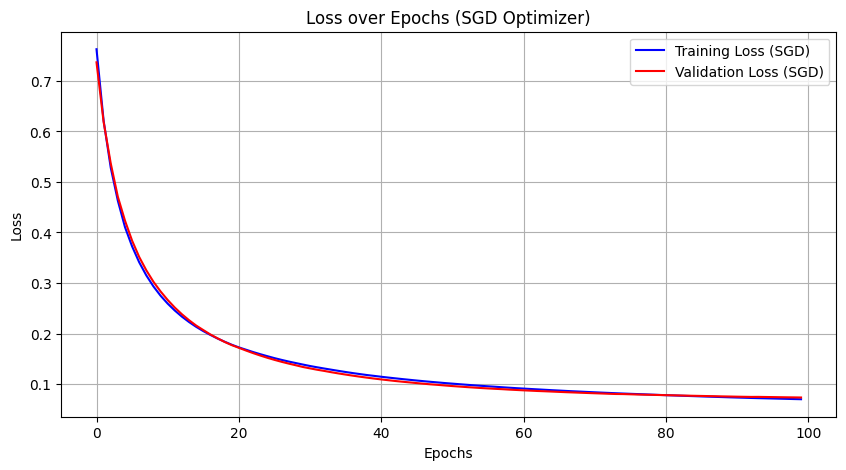

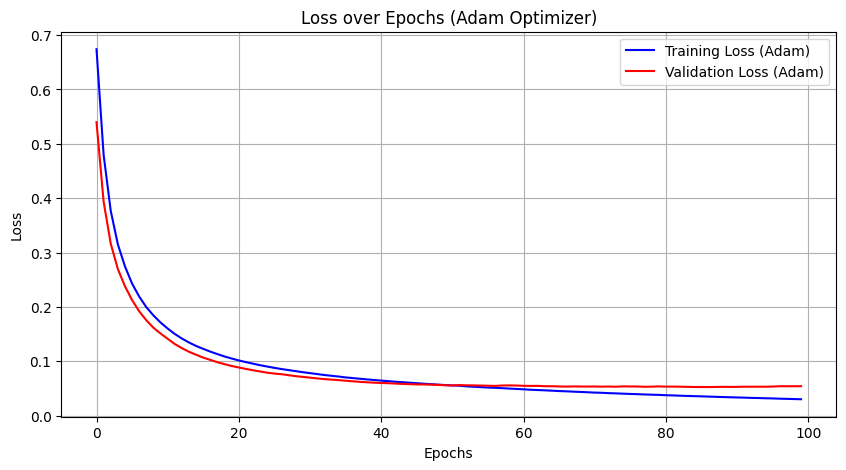

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

📊 SGD Results:
Accuracy:  0.9649
Precision: 0.9855
Recall:    0.9577
F1 Score:  0.9714
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

📊 Adam Results:
Accuracy:  0.9825
Precision: 0.9859
Recall:    0.9859
F1 Score:  0.9859


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

# Build model
model = Sequential([
    Dense(16, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer='glorot_uniform'),
    Dense(1, activation='sigmoid')
])

# Compile model using SGD

model.compile(optimizer=SGD(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
# Using Adam
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=32,
                    verbose=0)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss', c='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', c='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs [Keras]')
plt.legend()
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dự đoán nhị phân
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Tính các chỉ số
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# In kết quả
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

